<a href="https://colab.research.google.com/github/Jumponpatha/portfolio/blob/main/FinalProject_DataModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project Data Model(CPE232)**

## **Project** : Mercedes Benz Price Prediction

Member Group

*   Ms. Sarinyapak Namwong 			          64070503403
*   Mr. Jumponpatha Chaimongkonrojna 		  64070503408
*   Mr. Phanasorn Srisayam 			          64070503436
*   Mr. Warut Wannasert		                64070503448
*   Mr. Veerapat Toonhirunkorn 			      64070503474

SUBMITTED TO
Prof. SANTITHAM PROM-ON


Import library & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
mercedes = pd.read_csv('mercedes-price.csv')

Preview Data

In [ ]:
mercedes

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


# **Cleaning Data**

Check Data type info

In [ ]:
mercedes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


Check Null value

In [ ]:
mercedes.isnull().any()

model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
tax             False
mpg             False
engineSize      False
dtype: bool

Shape function

In [ ]:
mercedes.shape

(13119, 9)

Preprocess data

In [ ]:
mercedes.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


Checking frequency of 'transmission'

In [ ]:
pd.crosstab(mercedes['transmission'], columns='Count')

col_0,Count
transmission,
Automatic,4825
Manual,1444
Other,2
Semi-Auto,6848


* Note that, from column of transmission which contain Automatic, Manual, Semi-Auto and Other would see a 'Other' column were have only 2 data which could cause outlier.

Cleansing data by deleting transmission type 'Other'

In [ ]:
cleansing1 = mercedes[mercedes['transmission'] != 'Other'].dropna()
cleansing1

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


Showing 'transmission' data which had cleansed

<Axes: xlabel='count', ylabel='transmission'>

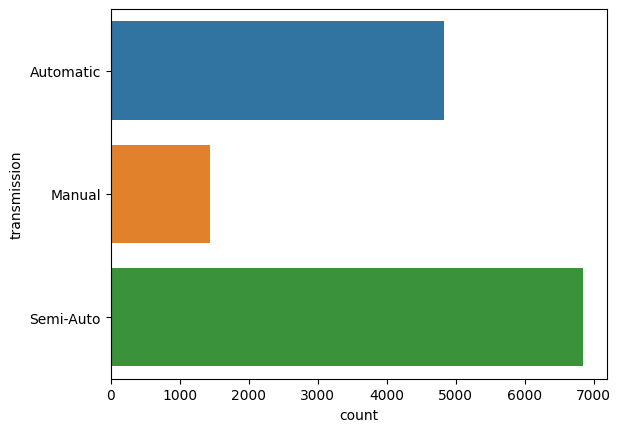

In [ ]:
sns.countplot(data=cleansing1, y='transmission')

Checking frequency of 'fuelType'

In [ ]:
pd.crosstab(mercedes['fuelType'], columns='Count')

col_0,Count
fuelType,
Diesel,9187
Hybrid,173
Other,7
Petrol,3752


* Note that, from column of fuelType which contain Automatic, Manual, Semi-Auto and Other would see a 'Other' column were have only 2 data which could cause outlier.

Cleansing data by deleting fuelType type 'Other'

In [ ]:
cleansing2 = cleansing1[cleansing1['fuelType'] != 'Other'].dropna()
cleansing2

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


Showing 'transmission' data which had cleansed

<Axes: xlabel='count', ylabel='fuelType'>

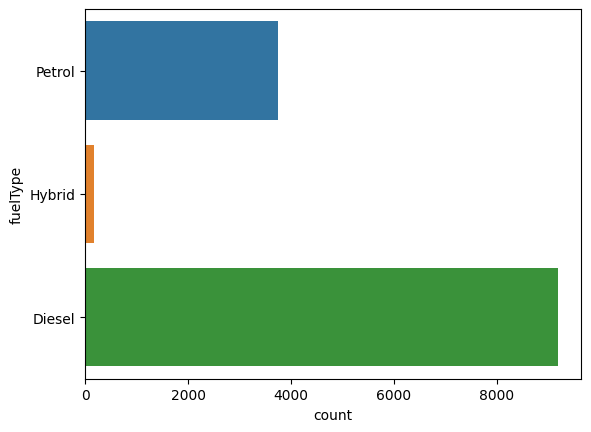

In [ ]:
sns.countplot(data=cleansing2, y='fuelType')

Describing Data

In [ ]:
mercedes2 = cleansing2.loc[:,'price':'engineSize']
mercedes2.describe()

,price,mileage,tax,mpg,engineSize
count,13111.000000,13111.000000,13111.000000,13111.000000,13111.000000
mean,24700.935016,21935.920067,130.020212,55.117443,2.071642
std,11843.607522,21169.443845,65.230548,15.094034,0.572256
min,650.000000,1.000000,0.000000,1.100000,0.000000
25%,17450.000000,6090.000000,125.000000,45.600000,1.800000
50%,22480.000000,15181.000000,145.000000,56.500000,2.000000
75%,28980.000000,31733.000000,145.000000,64.200000,2.100000
max,159999.000000,259000.000000,580.000000,217.300000,6.200000


Showing 'fuelType' data which had cleansed

<Axes: xlabel='year', ylabel='price'>

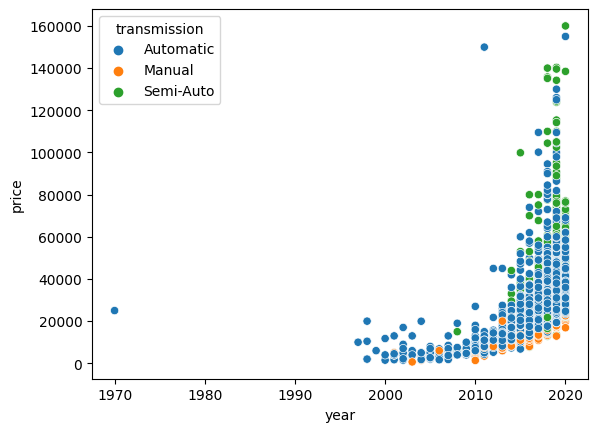

In [ ]:
sns.scatterplot(data=cleansing2, x="year", y = "price",hue="transmission")

* Find Outlier, so we should cleansing again by delete 1970 data.

In [ ]:
mercedes2 = cleansing2[cleansing2['year'] != 1970].dropna()
mercedes2

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


Number of sold car model each year

<Axes: xlabel='year', ylabel='price'>

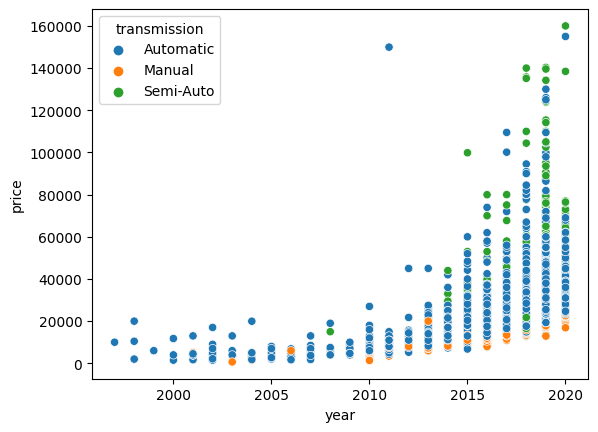

In [ ]:
sns.scatterplot(data=mercedes2, x="year", y = "price",hue="transmission")

Describing data

In [ ]:
mercedes2.describe()

,year,price,mileage,tax,mpg,engineSize
count,13110.000000,13110.000000,13110.000000,13110.000000,13110.000000,13110.000000
mean,2017.300381,24700.912281,21936.525400,130.006865,55.118658,2.071800
std,2.186392,11844.058963,21170.137793,65.215130,15.093970,0.571991
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6087.000000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15181.500000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31734.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


Show a price each transmission and each year

<Axes: xlabel='year', ylabel='price'>

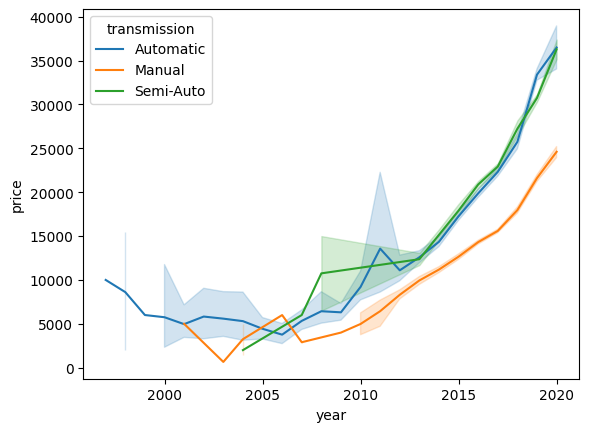

In [ ]:
sns.lineplot(data=mercedes2, x="year", y="price", hue="transmission")

Boxplot of price

<Axes: >

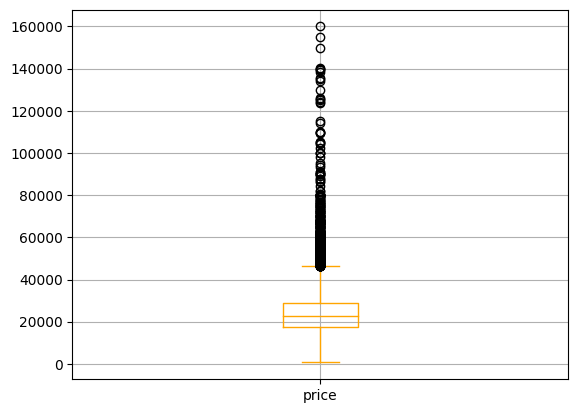

In [ ]:
mercedes2.boxplot(column='price', color='orange')

Histrogram of mercedes model

<ipython-input-21-c7d06b28821e>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


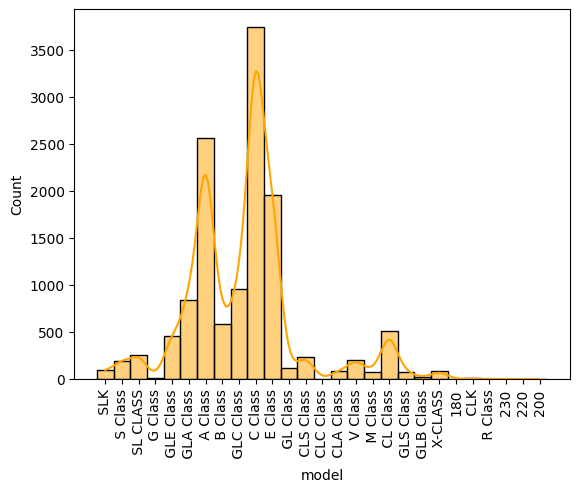

In [ ]:
ax = sns.histplot(data=mercedes2, x="model", kde=True, color='orange')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Histrogram of price

<Axes: xlabel='price', ylabel='Count'>

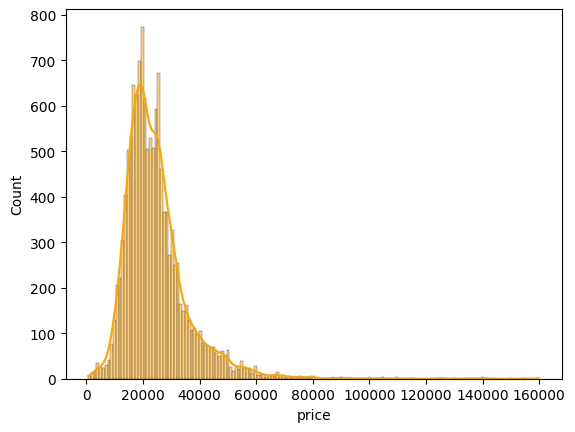

In [ ]:
sns.histplot(data=mercedes2, x="price", kde=True, color='orange')

Relation graph between model and price.

<ipython-input-23-e940c74c0a7b>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=model_mileage.index , y=model_mileage , palette=pal)


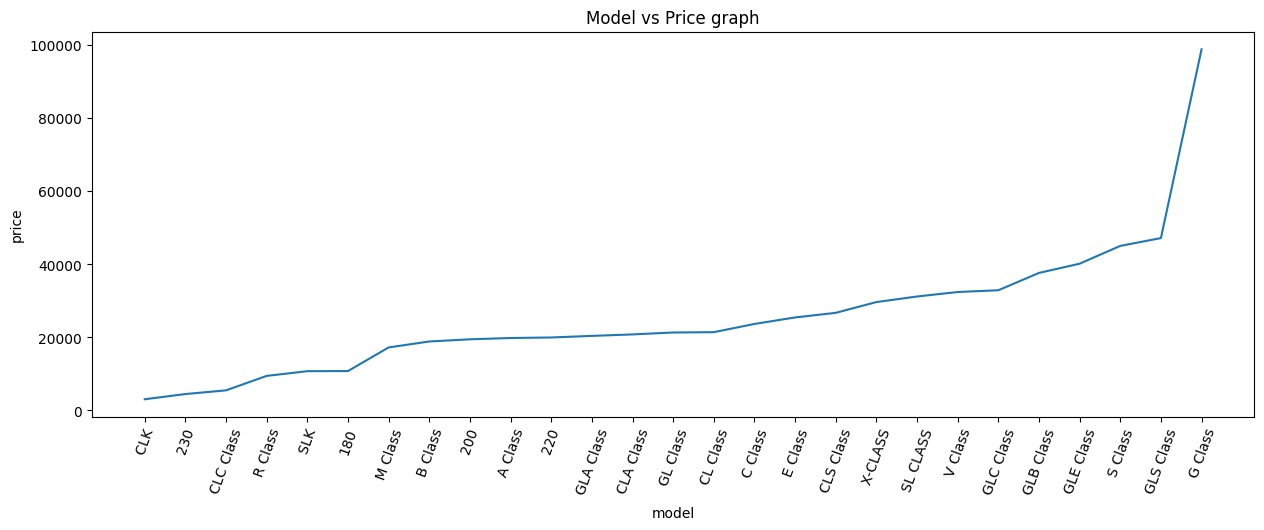

In [ ]:
model_mileage = mercedes2.groupby('model')['price'].mean().sort_values()
plt.figure(figsize=(15,5))
pal = sns.color_palette("Oranges", len(model_mileage))
sns.lineplot(x=model_mileage.index , y=model_mileage , palette=pal)

plt.xticks(rotation=70)

plt.title('Model vs Price graph')

plt.savefig("model_mileage.png")



---



Correlation

In [ ]:
mercedes2.corr()

<ipython-input-24-07e1643968ce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mercedes2.corr()


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.529856,-0.751821,0.016777,-0.099067,-0.150917
price,0.529856,1.000000,-0.537120,0.268688,-0.442304,0.516591
mileage,-0.751821,-0.537120,1.000000,-0.159173,0.202571,0.063691
tax,0.016777,0.268688,-0.159173,1.000000,-0.515186,0.339955
mpg,-0.099067,-0.442304,0.202571,-0.515186,1.000000,-0.343336
engineSize,-0.150917,0.516591,0.063691,0.339955,-0.343336,1.000000


Correlation Heatmap

<ipython-input-25-01cefc933d82>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mercedes2.corr(), annot=True)


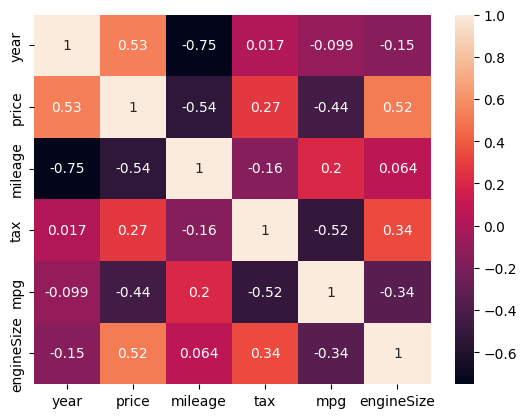

In [ ]:
#sns.set(font_scale=0.8)
sns.heatmap(mercedes2.corr(), annot=True)
plt.show()

**Modeling**

In [ ]:
from statsmodels.formula.api import ols

model = ols('price ~ year + model + mileage',mercedes2, missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     657.1
Date:                Fri, 22 Dec 2023   Prob (F-statistic):               0.00
Time:                        09:38:48   Log-Likelihood:            -1.3581e+05
No. Observations:               13110   AIC:                         2.717e+05
Df Residuals:                   13081   BIC:                         2.719e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.526e+06   9.99e+04    -35.280      0.000   -3.72e+06   -3.33e+06
model[T. B Class]   -1934.0683    349.020     -5.541      0.000   -2618.199   -1249.938
model[T. C Class]    4045.4522    196.084     20.631      0.000    3661.099    4429.805
model[T. CL Class]   2958.9588    370.586      7.985      0.000    2232.555    3685.362
model[T. CLA Class]  3071.7647    838.476      3.664      0.000    1428.231    4715.299
model[T. CLC Class]  4374.3458   4423.257      0.989      0.323   -4295.880     1.3e+04
model[T. CLK]        2.173e+04   2929.760      7.418      0.000     1.6e+04    2.75e+04
model[T. CLS Class]  9508.2015    519.746     18.294      0.000    8489.424    1.05e+04
model[T. E Class]    6387.2715    229.843     27.790      0.000    5936.746    6837.797
model[T. G Class]    7.961e+04   1979.464     40.219      0.000    7.57e+04    8.35e+04
model[T. GL Class]   6627.7082    713.375      9.291      0.000    5229.390    8026.026
model[T. GLA Class]  1407.0666    303.226      4.640      0.000     812.699    2001.434
model[T. GLB Class]  1.013e+04   1762.041      5.748      0.000    6673.581    1.36e+04
model[T. GLC Class]   1.12e+04    290.095     38.598      0.000    1.06e+04    1.18e+04
model[T. GLE Class]  1.922e+04    387.228     49.642      0.000    1.85e+04       2e+04
model[T. GLS Class]  2.587e+04    901.382     28.696      0.000    2.41e+04    2.76e+04
model[T. M Class]    1.152e+04    891.037     12.933      0.000    9777.475    1.33e+04
model[T. R Class]    1.191e+04   5414.372      2.199      0.028    1294.861    2.25e+04
model[T. S Class]    2.653e+04    566.818     46.808      0.000    2.54e+04    2.76e+04
model[T. SL CLASS]   1.122e+04    499.670     22.464      0.000    1.02e+04    1.22e+04
model[T. SLK]        7363.3553    841.464      8.751      0.000    5713.963    9012.747
model[T. V Class]    1.071e+04    552.951     19.371      0.000    9627.503    1.18e+04
model[T. X-CLASS]    5774.2202    858.513      6.726      0.000    4091.409    7457.031
model[T.180]         -145.0462   7645.552     -0.019      0.985   -1.51e+04    1.48e+04
model[T.200]        -2338.7692   7644.663     -0.306      0.760   -1.73e+04    1.26e+04
model[T.220]        -2684.9896   7644.730     -0.351      0.725   -1.77e+04    1.23e+04
model[T.230]         1.462e+04   7652.430      1.910      0.056    -384.699    2.96e+04
year                 1759.1944     49.500     35.539      0.000    1662.167    1856.222
mileage                -0.1597      0.005    -32.697      0.000      -0.169      -0.150
==============================================================================
Omnibus:                    13355.644   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1389613.293
Skew:                         

In [ ]:
res = model.predict(mercedes2)
res

0        -1319.685505
1        44708.037036
2        30963.314988
3        97786.336973
4        99702.669125
             ...     
13114    31731.223619
13115    25432.314421
13116    35349.176260
13117    35127.207280
13118    52206.807356
Length: 13110, dtype: float64

Distribution between Residual and Predicted plot

<ipython-input-28-ca3acec60a0e>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


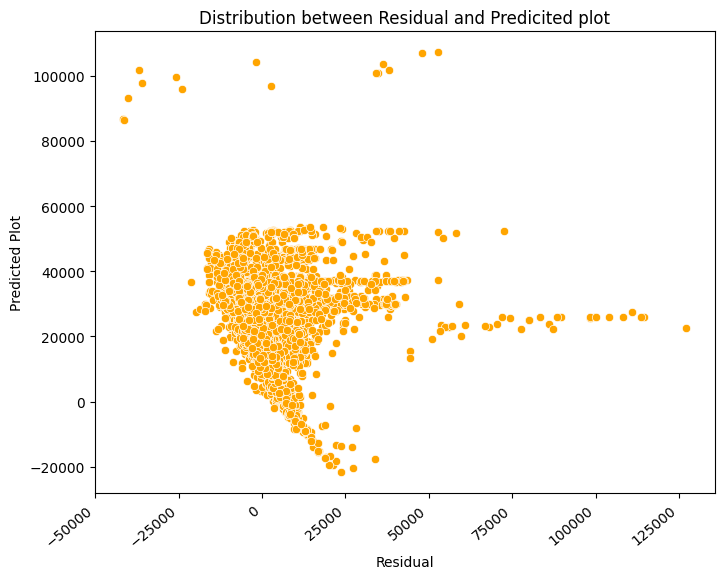

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set(title="Distribution between Residual and Predicited plot", xlabel="Residual", ylabel="Predicted Plot")
sns.scatterplot(x=model.resid, y=res, color='orange')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()

Accuracy


In [ ]:
mercedes_num = mercedes2.select_dtypes('number')

mercedes_object = mercedes2.select_dtypes('object')

mercedes_object1 = pd.get_dummies(mercedes_object, drop_first=True, columns=(['transmission','fuelType','model']))
#mercedes_object1 = pd.get_dummies(mercedes_object, drop_first=True)

mercedes_prep = pd.concat([mercedes_num,mercedes_object1], axis=1)
mercedes_prep

,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol,...,model_ R Class,model_ S Class,model_ SL CLASS,model_ SLK,model_ V Class,model_ X-CLASS,model_180,model_200,model_220,model_230
0,2005,5200,63000,325,32.1,1.8,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,2017,34948,27000,20,61.4,2.1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,2016,49948,6200,555,28.0,5.5,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,2016,61948,16000,325,30.4,4.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2016,73948,4000,325,30.1,4.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114,2020,35999,500,145,55.4,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13115,2020,24699,2500,145,55.4,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13116,2019,30999,11612,145,41.5,2.1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13117,2019,37990,2426,145,45.6,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

mercedes_train, mercedes_test = train_test_split(mercedes_prep, train_size = 0.7)

In [ ]:
mercedes_train.shape

(9177, 36)

In [ ]:
mercedes_test.shape

(3933, 36)

In [ ]:
from sklearn.linear_model import LinearRegression

tree = LinearRegression()
tree.fit(mercedes_train.drop(columns='price'),mercedes_train['price'])
accuracy = tree.score(mercedes_test.drop(columns='price'),mercedes_test['price'])
print('Accuracy:',accuracy)

Accuracy: 0.7624366075513542
